# Klassifikation mit strukturierten Daten

## Beispiel Iris-Datenset

### Vektorisierung

Einige Datensets sind bereits schon in `scikit-learn` eingebaut. Du brauchst dich nicht mehr darum zu kümmern, diese
* herunterzuladen,
* zu verifizieren und
* zu vektorisieren

Das [Iris-Datenset](https://en.wikipedia.org/wiki/Iris_flower_data_set) ist ein *Klassiker*:

![image](https://upload.wikimedia.org/wikipedia/commons/thumb/5/56/Kosaciec_szczecinkowaty_Iris_setosa.jpg/220px-Kosaciec_szczecinkowaty_Iris_setosa.jpg) ![image](https://upload.wikimedia.org/wikipedia/commons/thumb/4/41/Iris_versicolor_3.jpg/220px-Iris_versicolor_3.jpg) ![image](https://upload.wikimedia.org/wikipedia/commons/thumb/9/9f/Iris_virginica.jpg/220px-Iris_virginica.jpg)

In [1]:
from sklearn import datasets
iris = datasets.load_iris()

Leider in einem etwas sperrigen Format

In [2]:
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

Besser als `DataFrame` mit `pandas`

In [3]:
import pandas as pd
idf = pd.DataFrame(iris["data"], columns=["Sepal Length", "Sepal Width", "Petal Length", "Petal Width"])
idf["target"] = iris["target"]
idf["name"] = [iris["target_names"][target] for target in iris["target"]]
idf

,Sepal Length,Sepal Width,Petal Length,Petal Width,target,name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


*Five Number Summaries*

In [4]:
idf.describe()

,Sepal Length,Sepal Width,Petal Length,Petal Width,target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


Verteilungen als Histogramm plotten

<AxesSubplot:ylabel='Frequency'>

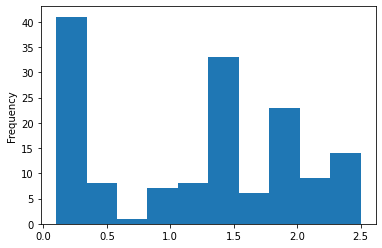

In [5]:
idf["Petal Width"].plot.hist()

Überlegung, welche Features sich besonders zur Differenzierung eignen:

<AxesSubplot:xlabel='Sepal Length', ylabel='Sepal Width'>

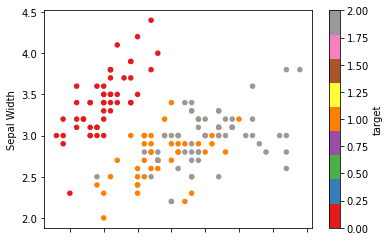

In [6]:
idf.plot.scatter(x="Sepal Length", y="Sepal Width", c="target", cmap="Set1")

Oder alle auf einmal? Hier erkennst du mögliche Korrelationen oder in welchen Dimensionen die Objekte sich am deutlichsten unterscheiden:

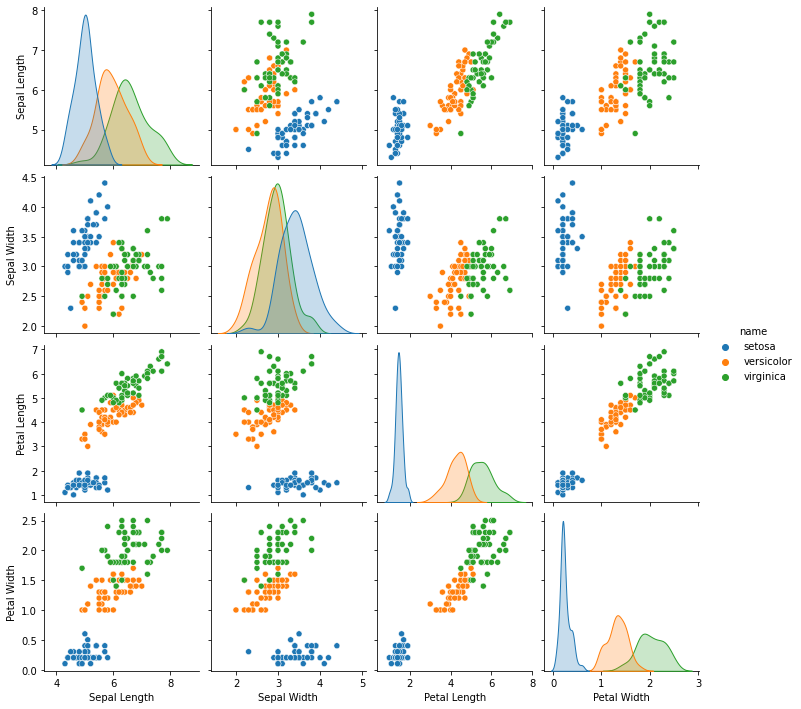

In [7]:
import seaborn as sns
sns.pairplot(idf.drop(columns=["target"]), hue="name")

### Iris-Klassifikation

Zum Training nutzt du die Iris-Daten, von denen du das Ergebnis schon kennst. Als Modell verwendest du eine sog. [Support Vector Machine](https://de.wikipedia.org/wiki/Support_Vector_Machine). Diese funktioniert sehr effizient:

In [8]:
from sklearn.linear_model import SGDClassifier
svm = SGDClassifier(loss='hinge', max_iter=1000, tol=1e-3, random_state=42)
svm.fit(iris['data'], iris['target'])

SGDClassifier(random_state=42)

Jetzt kannst du aus den Daten vorhersagen lassen, zu welcher Iris-Sorte eine Pflanze gehört, wenn du nur die Messwerte kennst.

In [9]:
svm.predict(iris['data'])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 2,
       2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Wie vergleicht sich das mit den echten Werten?

In [10]:
svm.predict(iris['data']) == iris['target']

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True, False,  True,  True,
       False,  True,

Eigentlich sieht das ganz gut aus, aber es gibt mehrere Probleme:
* Kann man die Performance des Klassifikators *messen*?
* Hat der Klassifikator evtl. nur (fast) alles auswendig gelernt oder kann er tatsächlich *abstrahieren*?

### Trainings-Test-Split

Um das zu beheben, kannst du die vorklassifizierte Datenmenge in zwei Teile zerlegen: eine *Trainingsmenge*, die nur dem Training des Klassifikators dient und eine davon unabhängige *Testmenge*, mit der der Klassifikator beweisen kann, wie gut er abstrahieren kann.

`scikit-learn` stellt dafür eine Funktion `train_test_split` zur Verfügung. Der `random_state` dient der Reproduzierbarkeit, mit `test_size` kann man das Verhältnis der beiden Mengengrößen wählen.

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris['data'], iris['target'], test_size = 0.25, random_state = 42)

Wieder trainierst du die SVM als Klassifikator:

In [12]:
svm = SGDClassifier(loss='hinge', max_iter=1000, tol=1e-3, random_state=42)
svm.fit(X_train, y_train)

SGDClassifier(random_state=42)

Dieses Mal sagst du die Spezies für die Testdaten vorher:

In [13]:
svm.predict(X_test) == y_test

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

Zwei Werte sind falsch vorhergesagt. Welche das sind, findest du in der [Confusion Matrix](https://en.wikipedia.org/wiki/Confusion_matrix):

In [14]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, svm.predict(X_test))

array([[15,  0,  0],
       [ 0, 11,  0],
       [ 0,  2, 10]])

Auf der Diagonalen stehen dort die richtig vorgergesagten Werte, die `2` außerhalb der Diagonale zeigt dir falsch vorhergesagte Ergebnisse. In diesem Fall wäre das richtige Ergebnis die Klasse `2` gewesen (2. Spalte), stattdessen wurde `3` vorhergesagt (3. Zeile).

Oftmals möchtest du die Genauigkeit der Klassifikation messen. Dazu dienen gleich zwei Größen, nämlich die Precision (Spezifizität) und der Recall (Sensitivität):

In [15]:
from sklearn.metrics import classification_report
print(classification_report(y_test, svm.predict(X_test)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       0.85      1.00      0.92        11
           2       1.00      0.83      0.91        12

    accuracy                           0.95        38
   macro avg       0.95      0.94      0.94        38
weighted avg       0.96      0.95      0.95        38



Im Gegensatz zur häufig verwendeten *Accuracy* können Precision und Recall auch mit *schiefen* Verteilungen umgehen.